In [1]:
from __future__ import division, print_function, unicode_literals
from numpy import *
import numpy as np
import matplotlib.pyplot as mplot
import matplotlib.pylab as plt
import matplotlib.cm as cm
import matplotlib as mpl
import pandas as pd
import seaborn as sns #Need to install
import scipy.stats as stats
import pylab
import warnings
warnings.filterwarnings('ignore')
from itertools import cycle
from sklearn.cluster import KMeans as km
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Lasso as LS
from sklearn.linear_model import Ridge as RG
from sklearn.tree import DecisionTreeRegressor as scart
from sklearn.manifold import TSNE
%matplotlib inline

**Loading CSV to dataframes
Production of crop**

In [2]:
crop_prod=pd.read_csv('/Users/omkar/Desktop/GithubProjects/Agriculture-project/agri_data/sum_prod.csv',delimiter=',')
crop_prod=crop_prod.fillna(0)
# print(crop_prod.dtypes)

In [3]:
crop_prod.sort_values(by=crop_prod.columns[0])
STATENAM = sorted(set(crop_prod.iloc[:,0].values))
crop_prod.head()

,STATENAM,YEAR,QWHEAT,QRICE,QMAIZE,QJOWAR,QBAJRA,QSUGAR,QPOTATO,QGNUT,...,QGRAM,QTUR,QRAGI,QSESAMUM,QRMSEED,QCOTTON,QOPULS,QSOY,QSUNFLWR,QJUTE
0,BIHAR,1956,184.533000,3795.153000,378.284,0.000,0.000,372.916000,291.570,0.000,...,145.682000,48.938,74.265,6.748,12.182000,0.00000,0.000,0.0,0.0,225.40752
1,HARYANA,1956,641.940000,82.846000,103.637,38.711,179.028,253.698000,35.561,5.962,...,1108.206000,27.958,0.000,0.784,56.899000,30.44538,37.391,0.0,0.0,0.00000
2,WEST_BENGAL,1956,27.198261,4801.670153,40.515,0.000,0.000,117.712172,313.612,0.000,...,120.312223,0.000,0.000,0.000,25.046186,0.00000,0.000,0.0,0.0,243.97758
3,MADHYA_PRADESH,1956,1730.200000,3316.400000,188.900,1099.600,91.100,169.800000,337.668,201.100,...,1007.100000,417.363,0.000,67.400,0.000000,101.22000,436.530,0.0,0.0,0.00000
4,KARNATAKA,1956,65.400000,1068.700000,8.400,851.000,112.600,344.550000,0.000,657.050,...,40.970000,181.318,0.000,0.000,0.000000,71.14000,79.560,0.0,0.0,0.00000


In [19]:
crop_price=pd.read_csv("/Users/omkar/Desktop/GithubProjects/Agriculture-project/agri_data/price_avg.csv",delimiter=',')
for i in range(1,crop_price.shape[1]):
    crop_price.iloc[:,i]=pd.to_numeric(crop_price.iloc[:,i],errors='coerce')
    crop_price.iloc[:,i]=crop_price.iloc[:,i].fillna(0)
crop_price.head()

,STATENAM,YEAR,PJOWAR,PMAIZE,PWHEAT,PSUGAR,PPOTATO,PGNUT,PRICE,PBAJRA,...,PTOBAC,PBARLEY,PGRAM,PSESAMUM,PRMSEED,PCOTTON,POPULS,PSOY,PSUNFLWR,PJUTE
0,BIHAR,1956,0.000000,29.885588,49.465294,41.099412,28.259765,36.620000,48.061176,0.000000,...,196.132588,34.117471,40.171471,70.066706,73.758824,0.000000,34.860412,0.0,0.0,40.333529
1,HARYANA,1956,27.611667,30.828667,39.260000,29.198577,28.707825,40.249539,31.051667,34.910000,...,134.408667,30.355833,31.949833,80.240000,72.116333,70.634165,31.949833,0.0,0.0,0.000000
2,WEST_BENGAL,1956,0.000000,27.967157,40.333238,41.578080,24.780750,0.000000,51.761852,0.000000,...,164.131440,30.733488,30.810286,0.000000,71.472148,0.000000,0.000000,0.0,0.0,66.223333
3,MADHYA_PRADESH,1956,35.146512,24.500000,43.913953,36.691395,28.560710,34.370930,42.751163,40.348837,...,301.959302,33.222590,33.322326,67.640465,60.122173,57.483488,37.528128,0.0,0.0,0.000000
4,KARNATAKA,1956,31.831579,27.757895,51.610526,32.278947,38.688244,40.758421,67.215789,29.078947,...,217.828421,48.226340,43.191579,49.941055,62.801414,82.564737,37.220526,0.0,0.0,0.000000


**Area of cultivation**

In [20]:
area_cult=pd.read_csv("/Users/omkar/Desktop/GithubProjects/Agriculture-project/agri_data/sum_area.csv",delimiter=',')
# print(sum(area_cult.isna()))
area_cult.head()

,STATENAM,YEAR,AWHEAT,ARICE,AMAIZE,AJOWAR,ABAJRA,ASUGAR,APOTATO,AGNUT,...,AGRAM,ATUR,ARAGI,ASESAMUM,ARMSEED,ACOTTON,AOPULS,ASOY,ASUNFLWR,AJUTE
0,BIHAR,1956,761.655000,4982.91100,612.143,0.00,0.000,162.511000,49.842000,0.000,...,496.049000,128.039,143.704,25.902,57.170000,0.000,0.000,0.0,0.0,249.785
1,HARYANA,1956,540.789000,98.26900,81.466,238.47,791.602,90.217000,2.294000,9.018,...,1346.922000,27.914,0.000,3.172,161.470000,117.813,147.602,0.0,0.0,0.000
2,WEST_BENGAL,1956,84.763967,4445.18468,56.100,0.00,0.000,24.170931,47.924049,0.000,...,194.129557,0.000,0.000,0.000,72.692308,0.000,0.000,0.0,0.0,271.827
3,MADHYA_PRADESH,1956,3240.300000,3889.40000,430.100,1644.70,172.000,52.910000,28.759000,346.080,...,1543.300000,486.501,0.000,321.030,0.000000,767.410,1026.790,0.0,0.0,0.000
4,KARNATAKA,1956,309.800000,942.60000,10.000,2597.40,534.500,54.420000,0.000000,938.500,...,159.150000,401.276,0.000,0.000,0.000000,1183.150,291.170,0.0,0.0,0.000


**Price of the crop**

In [21]:
crop_price.head()

,STATENAM,YEAR,PJOWAR,PMAIZE,PWHEAT,PSUGAR,PPOTATO,PGNUT,PRICE,PBAJRA,...,PTOBAC,PBARLEY,PGRAM,PSESAMUM,PRMSEED,PCOTTON,POPULS,PSOY,PSUNFLWR,PJUTE
0,BIHAR,1956,0.000000,29.885588,49.465294,41.099412,28.259765,36.620000,48.061176,0.000000,...,196.132588,34.117471,40.171471,70.066706,73.758824,0.000000,34.860412,0.0,0.0,40.333529
1,HARYANA,1956,27.611667,30.828667,39.260000,29.198577,28.707825,40.249539,31.051667,34.910000,...,134.408667,30.355833,31.949833,80.240000,72.116333,70.634165,31.949833,0.0,0.0,0.000000
2,WEST_BENGAL,1956,0.000000,27.967157,40.333238,41.578080,24.780750,0.000000,51.761852,0.000000,...,164.131440,30.733488,30.810286,0.000000,71.472148,0.000000,0.000000,0.0,0.0,66.223333
3,MADHYA_PRADESH,1956,35.146512,24.500000,43.913953,36.691395,28.560710,34.370930,42.751163,40.348837,...,301.959302,33.222590,33.322326,67.640465,60.122173,57.483488,37.528128,0.0,0.0,0.000000
4,KARNATAKA,1956,31.831579,27.757895,51.610526,32.278947,38.688244,40.758421,67.215789,29.078947,...,217.828421,48.226340,43.191579,49.941055,62.801414,82.564737,37.220526,0.0,0.0,0.000000


**Average Price of the crop Yearwise**

In [22]:
crop_price_year=pd.read_csv('/Users/omkar/Desktop/GithubProjects/Agriculture-project/agri_data/price_year.csv',delimiter=',')
crop_price_year=crop_price_year.fillna(0)

In [23]:
crop_price_year.head()


,YEAR,PWHEAT,PRICE,PMAIZE,PJOWAR,PBAJRA,PSUGAR,PPOTATO,PGNUT,PBARLEY,...,PGRAM,PTUR,PRAGI,PSESAMUM,PRMSEED,PCOTTON,POPULS,PSOY,PSUNFLWR,PJUTE
0,1956,43.187258,41.190087,28.484940,26.356545,27.769277,37.426100,28.402587,39.285801,29.471242,...,35.462950,32.734899,29.450375,67.710816,64.721887,63.907390,31.900534,0.0,0.0,17.741169
1,1957,42.979839,43.562016,30.040616,24.083642,26.280011,39.113553,28.623609,41.796386,26.906162,...,34.193125,31.540664,28.856264,70.519070,64.756141,70.327843,35.020101,0.0,0.0,17.149851
2,1958,48.813222,43.926039,32.844178,26.744115,29.063172,47.341284,28.608965,43.134198,32.809844,...,43.004186,39.672414,31.825891,71.077195,65.799562,74.871588,41.072037,0.0,0.0,16.706689
3,1959,46.862000,44.066294,30.495578,27.666089,28.522844,49.530732,29.562451,46.290822,27.782508,...,38.707483,36.135408,30.530407,69.959613,66.181269,74.052776,39.225863,0.0,0.0,15.250956
4,1960,45.090633,43.425872,31.000470,27.557708,29.708605,43.186069,28.711125,50.377390,27.367883,...,39.547193,36.645273,31.438156,83.893891,76.462328,89.697121,39.581415,0.0,0.0,31.098163


**Visualization of the Crop Price data**

NameError: name 'area_cult_year' is not defined

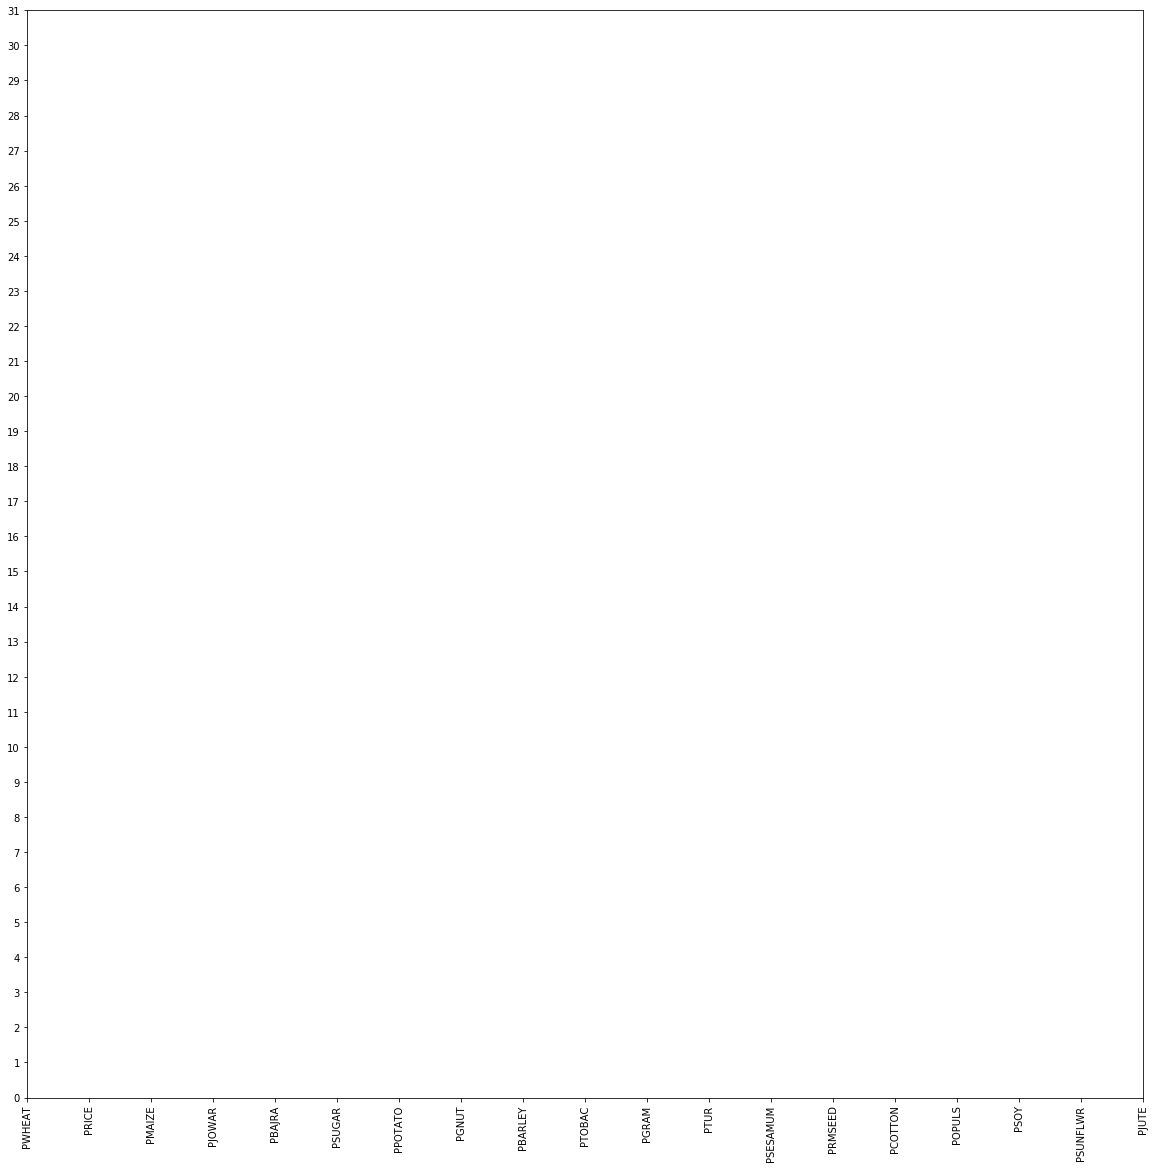

In [29]:
mat1 = np.matrix(crop_price_year.values[:,1:],dtype='float')
# print(mat2.shape)
#mat2=np.delete(mat2,12,1)
# print(mat2.shape)
fig = plt.figure(num=1,figsize=(20,20))
ax = fig.add_subplot(1,1,1)
# ax.set_aspect('equal')
ax.set_xticks(np.arange(len(np.delete(crop_price_year.columns[1:],12))))
ax.set_yticks(np.arange(len(crop_price_year.iloc[:,0])))
ax.set_xticklabels(np.delete(crop_price_year.columns[1:],12),rotation='vertical')
ax.set_yticklabels(area_cult_year.iloc[:,0])
plt.imshow(mat1, cmap='Blues')
plt.colorbar()
plt.title('Crop Prices')
plt.show()

**Area under Cultivation Yearly**

In [30]:
area_cult_year=pd.read_csv('/Users/omkar/Desktop/GithubProjects/Agriculture-project/agri_data/area_year.csv',delimiter=',')
area_cult_year=area_cult_year.fillna(0)


FileNotFoundError: [Errno 2] File b'/Users/omkar/Desktop/GithubProjects/Agriculture-project/agri_data/area_year.csv' does not exist: b'/Users/omkar/Desktop/GithubProjects/Agriculture-project/agri_data/area_year.csv'

In [82]:
area_cult_year.head()

,YEAR,WHEAT,RICE,MAIZE,JOWAR,BAJRA,SUGAR,POTATO,GNUT,BARLEY,...,GRAM,TUR,RAGI,SESAMUM,RMSEED,COTTON,OPULS,SOY,SUNFLWR,JUTE
0,1956,12951.36897,28783.21868,3352.050,16496.839,11386.333,2021.141931,231.402049,5674.862,3520.938514,...,9655.280557,3064.431,210.719,1643.351,880.358308,7944.251,5086.020,0.0,0.0,580.983
1,1957,11124.86045,28693.36952,3679.540,17247.415,11107.748,2021.018879,258.429187,6414.056,3169.552666,...,9100.404669,3100.436,234.834,1587.144,994.199430,7932.753,5169.518,0.0,0.0,547.372
2,1958,11964.39013,29432.29205,3782.756,17895.009,11357.569,1907.863530,271.796749,6240.430,3343.798489,...,10071.397620,3143.685,263.433,1731.856,966.217271,7866.980,5185.647,0.0,0.0,561.731
3,1959,12724.82640,30077.45306,3881.671,17645.206,10645.070,2078.814530,290.731068,6449.811,3393.273385,...,10336.769820,3140.471,269.401,1657.272,845.306753,7220.447,5203.516,0.0,0.0,497.293
4,1960,12259.01078,30315.49543,3925.277,18411.868,11482.312,2353.335932,291.139436,6449.220,3220.483023,...,9229.449101,3122.379,277.621,1455.727,840.690470,7536.802,5155.862,0.0,0.0,489.865


**Visualization of the Area under cultivation data**

In [25]:
mat2 = np.matrix(area_cult_year.values[:,1:],dtype='float')
# print(mat2.shape)
mat2=np.delete(mat2,12,1)
# print(mat2.shape)
fig = plt.figure(num=2,figsize=(20,20))
ax = fig.add_subplot(1,1,1)
# ax.set_aspect('equal')
ax.set_xticks(np.arange(len(np.delete(area_cult_year.columns[1:],12))))
ax.set_yticks(np.arange(len(area_cult_year.iloc[:,0])))
ax.set_xticklabels(np.delete(area_cult_year.columns[1:],12),rotation='vertical')
ax.set_yticklabels(area_cult_year.iloc[:,0])
plt.imshow(mat2, cmap='Blues')
plt.colorbar()
plt.title('Cultivation Area')
plt.show()

NameError: name 'area_cult_year' is not defined

**Production of the crop**

In [85]:
crop_prod_year=pd.read_csv('/Users/pranitaeugena/Desktop/agri_data/prod_year.csv',delimiter=',')
crop_prod_year=crop_prod_year.fillna(0)

In [86]:
crop_prod_year.head()

,YEAR,WHEAT,RICE,MAIZE,JOWAR,BAJRA,SUGAR,POTATO,GNUT,BARLEY,...,GRAM,TUR,RAGI,SESAMUM,RMSEED,COTTON,OPULS,SOY,SUNFLWR,JUTE
0,1956,8994.794262,25509.26915,2710.378,7631.323,2886.312,7013.055172,1672.284000,4566.565,2973.464745,...,6212.494223,2277.251,101.561,335.712,355.080186,816.32676,1990.496,0.0,0.0,530.96454
1,1957,7343.911870,21604.97523,2802.579,8597.357,3616.600,6901.704800,1875.045115,4673.989,2456.824085,...,4913.056160,2310.780,103.601,263.962,368.882894,818.12932,1925.913,0.0,0.0,504.95670
2,1958,9413.368621,27008.66144,2992.087,8984.954,3838.561,7096.408200,2150.681824,5144.230,2780.001367,...,7018.333270,2357.383,127.347,387.458,380.403559,822.39198,2739.836,0.0,0.0,700.33716
3,1959,9789.582790,27687.38011,3602.979,8516.071,3465.496,7670.902600,2516.961578,4529.749,2799.343293,...,5621.398290,2337.247,153.424,271.376,291.225574,611.17560,2661.684,0.0,0.0,556.20468
4,1960,10528.610090,30394.82344,3594.961,9834.699,3254.185,10798.259200,2462.428590,4727.999,2905.219627,...,6284.399685,2336.095,133.415,186.139,364.405310,926.04960,2673.806,0.0,0.0,565.71696


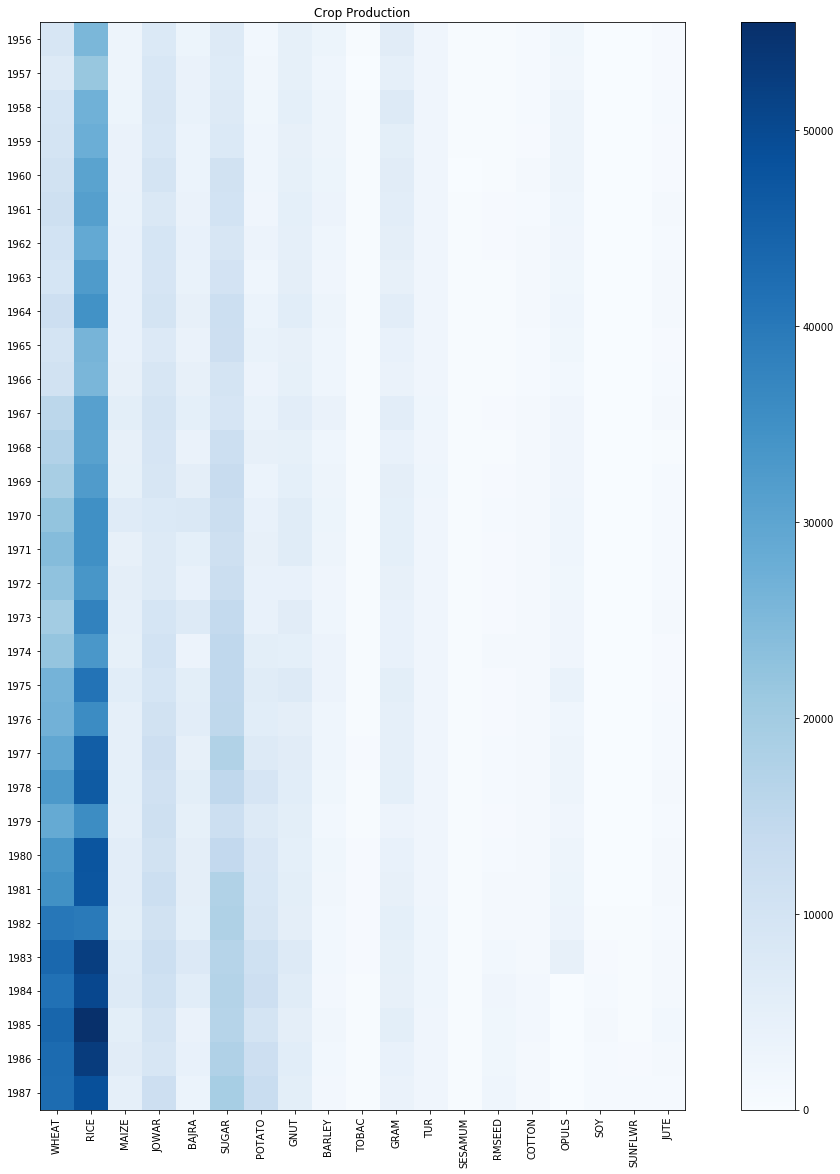

In [87]:
mat3 = np.matrix(crop_prod_year.values[:,1:],dtype='float')
# print(mat3.shape)
mat3=np.delete(mat3,12,1)
# print(mat3.shape)
fig = plt.figure(num=3,figsize=(20,20))
ax = fig.add_subplot(1,1,1)
# ax.set_aspect('equal')
ax.set_xticks(np.arange(len(np.delete(crop_prod_year.columns[1:],12))))
ax.set_yticks(np.arange(len(crop_prod_year.iloc[:,0])))
ax.set_xticklabels(np.delete(crop_prod_year.columns[1:],12),rotation='vertical')
ax.set_yticklabels(crop_prod_year.iloc[:,0])
plt.imshow(mat3, cmap='Blues')
plt.colorbar()
plt.title('Crop Production')
plt.show()

In [88]:
crop_yield_year=pd.read_csv('/Users/pranitaeugena/Desktop/agri_data/yield_year.csv',delimiter=',')
crop_yield_year=crop_yield_year.fillna(0)
crop_yield_year.head()

,YEAR,WHEAT,RICE,MAIZE,JOWAR,BAJRA,SUGAR,POTATO,GNUT,BARLEY,...,GRAM,TUR,RAGI,SESAMUM,RMSEED,COTTON,OPULS,SOY,SUNFLWR,JUTE
0,1956,142.139663,218.379154,154.830737,96.688463,74.567994,932.039639,1277.152929,218.874660,141.521991,...,129.680089,184.054121,13.587052,53.543472,55.100672,19.275587,85.766453,0.0,0.0,83.337570
1,1957,139.862257,194.720165,142.682246,113.721145,82.210835,946.250554,1246.345073,217.885092,139.974844,...,110.575844,184.840416,11.859708,50.255022,55.880623,18.768086,80.682155,0.0,0.0,73.241272
2,1958,165.875684,230.494105,167.739962,123.213744,88.798229,976.526417,1320.211813,242.891415,149.543476,...,137.875324,185.804497,13.132560,59.552844,67.812583,18.392946,110.787131,0.0,0.0,83.143390
3,1959,162.037833,229.635559,168.982956,117.295837,85.409247,979.687464,1325.044479,250.922041,142.864689,...,122.222772,183.805294,14.488696,48.317224,46.815507,17.765593,106.054610,0.0,0.0,82.817122
4,1960,177.034342,232.637265,176.061540,117.248091,86.372075,1089.761573,1342.382784,189.897089,154.604827,...,134.372115,185.009440,12.806572,43.608872,51.638454,23.710441,108.738404,0.0,0.0,82.321341


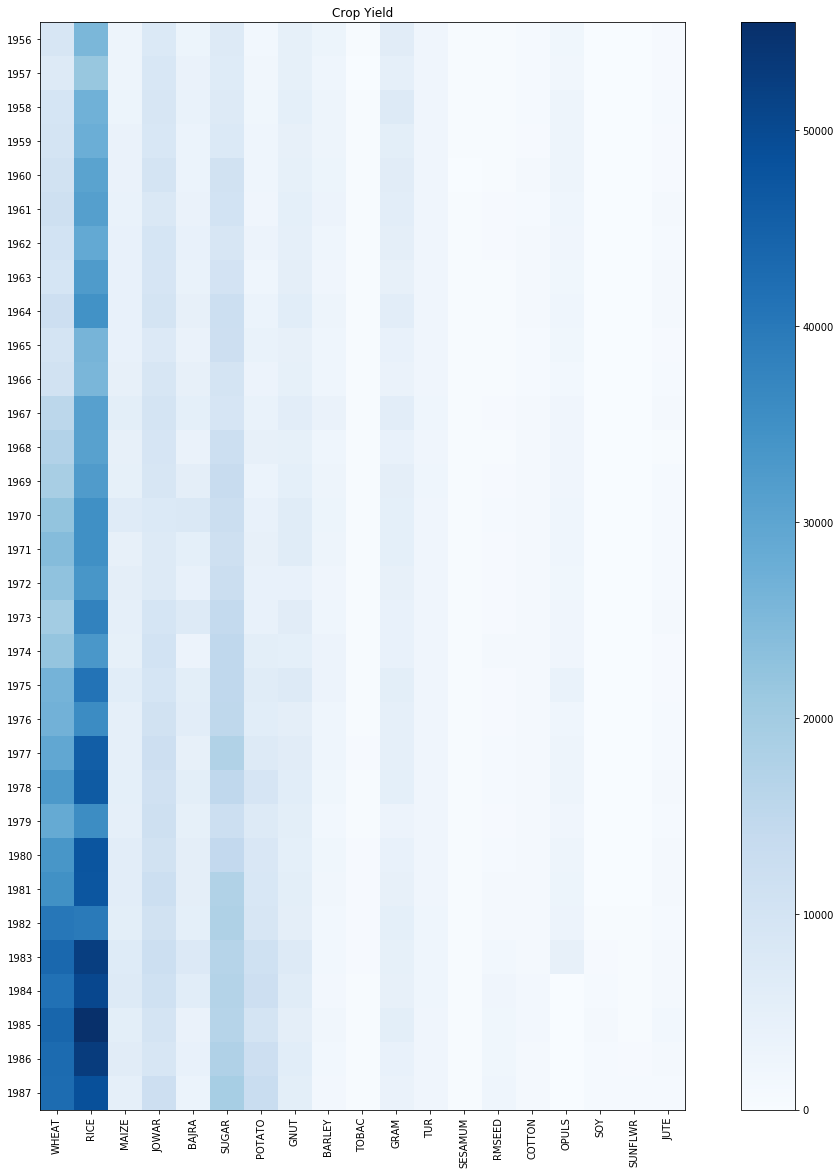

In [89]:
mat4 = np.matrix(crop_prod_year.values[:,1:],dtype='float')
# print(mat3.shape)
mat4=np.delete(mat4,12,1)
# print(mat3.shape)
fig = plt.figure(num=4,figsize=(20,20))
ax = fig.add_subplot(1,1,1)
# ax.set_aspect('equal')
ax.set_xticks(np.arange(len(np.delete(crop_yield_year.columns[1:],12))))
ax.set_yticks(np.arange(len(crop_yield_year.iloc[:,0])))
ax.set_xticklabels(np.delete(crop_yield_year.columns[1:],12),rotation='vertical')
ax.set_yticklabels(crop_yield_year.iloc[:,0])
plt.imshow(mat3, cmap='Blues')
plt.colorbar()
plt.title('Crop Yield')
plt.show()

**Annual Rainfall**

In [65]:
rainfall =  pd.read_csv('/Users/pranitaeugena/Desktop/agri_data/rainfall_no_missing.csv',delimiter=',')
rainfall.head()

,State,YEAR,RNJAN,RNFEB,RNMAR,RNAPR,RNMAY,RNJUN,RNJUL,RNAUG,RNSEP,RNOCT,RNNOV,RNDEC,Annual
0,PUNJAB,1956,21.60,6.80,45.30,5.10,0.70,53.5,236.50,28.70,26.70,14.10,0.20,5.30,444.50
1,BIHAR,1956,19.20,4.60,9.60,5.30,74.90,319.0,2.70,286.40,36.00,169.00,35.90,8.20,970.80
2,HARYANA,1956,16.80,3.00,24.80,0.80,2.20,5.7,23.30,161.60,21.50,132.40,4.80,0.60,397.50
3,MADHYA_PRADESH,1956,8.00,3.15,5.05,1.05,37.50,150.0,468.35,325.35,156.35,84.55,33.25,13.75,1286.35
4,WEST_BENGAL,1956,9.65,17.65,24.15,95.25,92.25,545.6,362.65,391.10,338.15,186.70,7.90,3.75,2074.80


In [66]:
rainfall1=rainfall.copy()
rainfall1 = rainfall1.groupby(['State','YEAR'],as_index=True).mean()


In [71]:
rainfall1.head()

RNJAN     RNFEB      RNMAR      RNAPR      RNMAY  \
State          YEAR                                                        
ANDHRA_PRADESH 1956  3.233333  1.900000   4.452492  32.266667  42.233333   
               1957  4.074852  2.366667  14.100000  15.566667  31.766667   
               1958  3.333333  4.333333   6.566667  22.666667  33.200000   
               1959  1.766667  6.766667   7.971650  14.533333  10.666667   
               1960  0.766667  7.517040  17.733333   4.433333  30.366667   

                          RNJUN       RNJUL       RNAUG       RNSEP  \
State          YEAR                                                   
ANDHRA_PRADESH 1956   95.566667  147.366667  118.333333  170.000000   
               1957  104.000000   15.200000  202.433333   81.600000   
               1958   28.033333  207.566667  237.500000  110.833333   
               1959  109.566667  217.300000   98.666667  147.200000   
               1960  104.200000  142.966667   57.300000  242.600000   

                          RNOCT       RNNOV      RNDEC      Annual  
State          YEAR                                                 
ANDHRA_PRADESH 1956  191.033333   85.000000  21.233333  912.619158  
               1957   89.466667   56.111050   4.666352  621.352254  
               1958  159.833333   91.866667  11.566352  917.299686  
               1959  110.366667   14.066667   6.433333  745.304983  
               1960   24.233333  103.766667   7.966667  743.850373

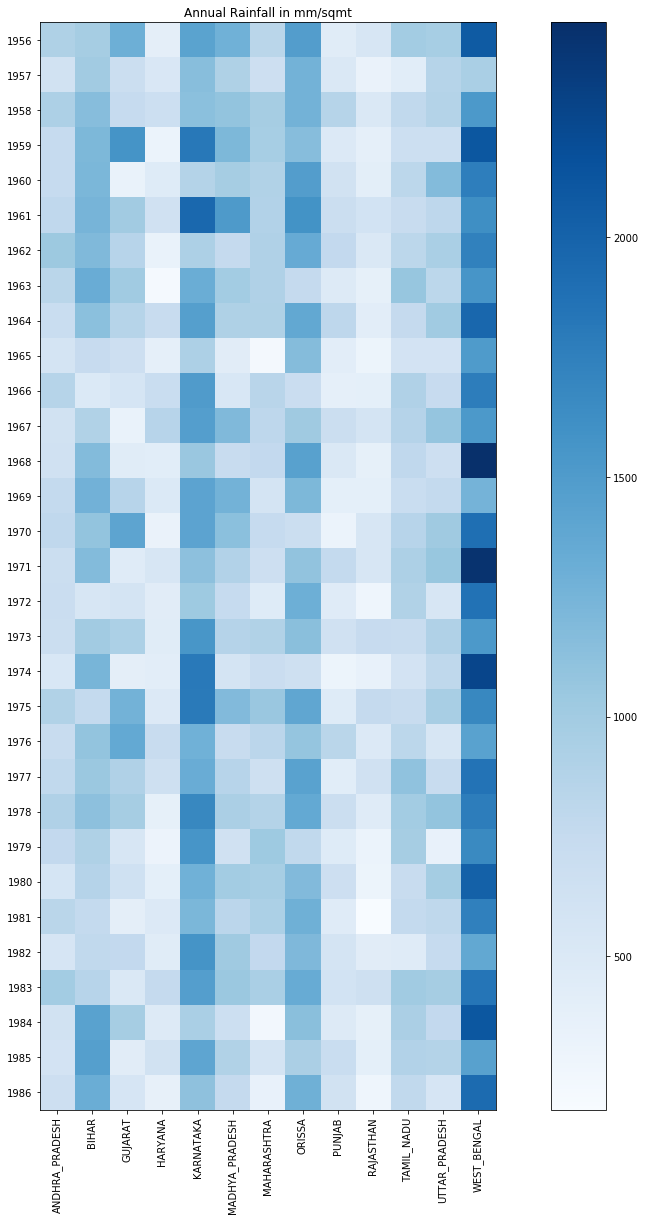

In [68]:
mat5 = np.matrix(rainfall1.iloc[:,12].unstack(level=-1).reset_index().values[:,1:],dtype='float').T
fig = plt.figure(num=5,figsize=(20,20))
ax = fig.add_subplot(1,1,1)
ax.set_yticks(np.arange(len(rainfall1.iloc[:,12].unstack(level=-1).reset_index().columns[1:])))
ax.set_xticks(np.arange(len(rainfall1.iloc[:,12].unstack(level=-1).reset_index().values[:,0])))
ax.set_yticklabels(rainfall1.iloc[:,12].unstack(level=-1).reset_index().columns[1:])
ax.set_xticklabels(rainfall1.iloc[:,12].unstack(level=-1).reset_index().values[:,0],rotation='vertical')
plt.imshow(mat5, cmap='Blues')
plt.colorbar()
plt.title('Annual Rainfall in mm/sqmt')
plt.show()

In [70]:
crop_price_year=pd.read_csv('/Users/pranitaeugena/Desktop/agri_data/price_year.csv',delimiter=',')
crop_price_year=crop_price_year.fillna(0)
crop_price_year.head()

,YEAR,PWHEAT,PRICE,PMAIZE,PJOWAR,PBAJRA,PSUGAR,PPOTATO,PGNUT,PBARLEY,...,PGRAM,PTUR,PRAGI,PSESAMUM,PRMSEED,PCOTTON,POPULS,PSOY,PSUNFLWR,PJUTE
0,1956,43.187258,41.190087,28.484940,26.356545,27.769277,37.426100,28.402587,39.285801,29.471242,...,35.462950,32.734899,29.450375,67.710816,64.721887,63.907390,31.900534,0.0,0.0,17.741169
1,1957,42.979839,43.562016,30.040616,24.083642,26.280011,39.113553,28.623609,41.796386,26.906162,...,34.193125,31.540664,28.856264,70.519070,64.756141,70.327843,35.020101,0.0,0.0,17.149851
2,1958,48.813222,43.926039,32.844178,26.744115,29.063172,47.341284,28.608965,43.134198,32.809844,...,43.004186,39.672414,31.825891,71.077195,65.799562,74.871588,41.072037,0.0,0.0,16.706689
3,1959,46.862000,44.066294,30.495578,27.666089,28.522844,49.530732,29.562451,46.290822,27.782508,...,38.707483,36.135408,30.530407,69.959613,66.181269,74.052776,39.225863,0.0,0.0,15.250956
4,1960,45.090633,43.425872,31.000470,27.557708,29.708605,43.186069,28.711125,50.377390,27.367883,...,39.547193,36.645273,31.438156,83.893891,76.462328,89.697121,39.581415,0.0,0.0,31.098163


In [72]:
cpy=transpose(crop_price_year)
cpy.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
YEAR,1956.000000,1957.000000,1958.000000,1959.000000,1960.000000,1961.000000,1962.000000,1963.000000,1964.000000,1965.000000,...,1978.000000,1979.000000,1980.000000,1981.000000,1982.000000,1983.000000,1984.000000,1985.000000,1986.000000,1987.000000
PWHEAT,43.187258,42.979839,48.813222,46.862000,45.090633,46.742005,47.420532,57.210559,70.005913,87.460120,...,134.060697,149.230603,176.943972,185.619414,211.000164,195.560545,182.584921,203.533868,212.144970,215.174556
PRICE,41.190087,43.562016,43.926039,44.066294,43.425872,44.147218,49.547925,56.937961,68.734669,87.185401,...,140.295255,142.689989,153.199296,168.825363,191.570996,207.124072,178.561991,193.439612,200.422899,228.521716
PMAIZE,28.484940,30.040616,32.844178,30.495578,31.000470,30.426459,31.551339,35.089808,50.369200,60.508726,...,99.086459,111.593353,121.604203,136.507035,148.391233,149.120853,142.639323,167.793713,179.183432,184.292899
PJOWAR,26.356545,24.083642,26.744115,27.666089,27.557708,28.333015,29.113625,34.083852,44.804735,49.987318,...,85.010203,90.841008,108.343647,117.330879,124.293654,130.322686,134.098402,145.943373,149.399408,153.585799
